In [1]:
# import necessary libraries
import os,sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from scipy import stats

In [2]:
# Import excel file
df=pd.read_csv('Concrete_Data.csv')

In [3]:
# To get first five record from dataset
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
# Check null values
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age                              0
Concrete compressive strength    0
dtype: int64

In [5]:
# To get the info of Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1030 non-null   float64
 1   Blast Furnace Slag             1030 non-null   float64
 2   Fly Ash                        1030 non-null   float64
 3   Water                          1030 non-null   float64
 4   Superplasticizer               1030 non-null   float64
 5   Coarse Aggregate               1030 non-null   float64
 6   Fine Aggregate                 1030 non-null   float64
 7   Age                            1030 non-null   int64  
 8   Concrete compressive strength  1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [6]:
# To check the number of rows and columns in data
df.shape

(1030, 9)

In [7]:
# To generate descriptive statistics 
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


Cement                              Axes(0.125,0.53;0.0731132x0.35)
Blast Furnace Slag               Axes(0.212736,0.53;0.0731132x0.35)
Fly Ash                          Axes(0.300472,0.53;0.0731132x0.35)
Water                            Axes(0.388208,0.53;0.0731132x0.35)
Superplasticizer                 Axes(0.475943,0.53;0.0731132x0.35)
Coarse Aggregate                 Axes(0.563679,0.53;0.0731132x0.35)
Fine Aggregate                   Axes(0.651415,0.53;0.0731132x0.35)
Age                              Axes(0.739151,0.53;0.0731132x0.35)
Concrete compressive strength    Axes(0.826887,0.53;0.0731132x0.35)
dtype: object

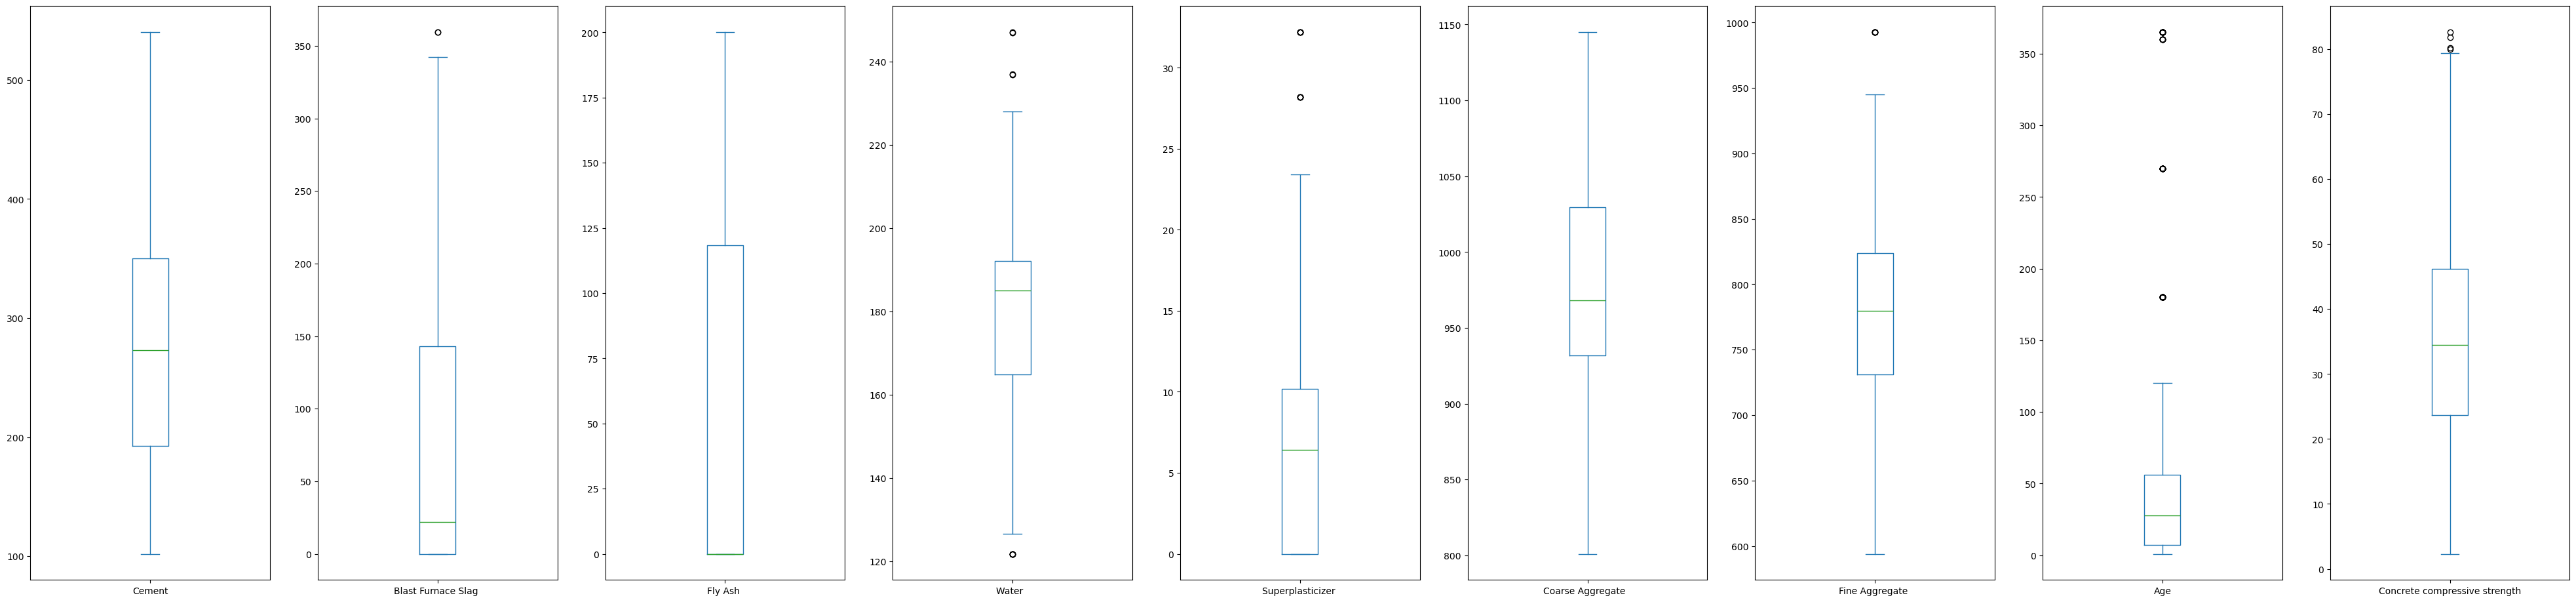

In [8]:
# To create a series of box plots for each column in a DataFrame
df.plot(kind='box',subplots=True,layout=(2,9),figsize=(50,25))

In [9]:
#How to remove outliers
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
ub=Q3+1.5*IQR
lb=Q1-1.5*IQR

In [10]:
print(Q1)
print('****************************')
print(Q3)
print('****************************')
print(IQR)
print('****************************')
print(ub)
print('****************************')
print(lb)

Cement                           192.375
Blast Furnace Slag                 0.000
Fly Ash                            0.000
Water                            164.900
Superplasticizer                   0.000
Coarse Aggregate                 932.000
Fine Aggregate                   730.950
Age                                7.000
Concrete compressive strength     23.710
Name: 0.25, dtype: float64
****************************
Cement                            350.000
Blast Furnace Slag                142.950
Fly Ash                           118.300
Water                             192.000
Superplasticizer                   10.200
Coarse Aggregate                 1029.400
Fine Aggregate                    824.000
Age                                56.000
Concrete compressive strength      46.135
Name: 0.75, dtype: float64
****************************
Cement                           157.625
Blast Furnace Slag               142.950
Fly Ash                          118.300
Water             

In [11]:
outlier=df[((df<lb)|(df>ub)).any(axis=1)]
print(outlier)

      Cement  Blast Furnace Slag   Fly Ash   Water    Superplasticizer   \
0      540.0                  0.0       0.0    162.0                2.5   
2      332.5                142.5       0.0    228.0                0.0   
3      332.5                142.5       0.0    228.0                0.0   
4      198.6                132.4       0.0    192.0                0.0   
6      380.0                 95.0       0.0    228.0                0.0   
...      ...                  ...       ...      ...                ...   
823    322.0                  0.0       0.0    203.0                0.0   
862    140.0                164.0     128.0    237.0                6.0   
873    237.0                 92.0      71.0    247.0                6.0   
936    236.9                 91.7      71.5    246.9                6.0   
1019   139.7                163.9     127.7    236.7                5.8   

      Coarse Aggregate    Fine Aggregate   Age  Concrete compressive strength  
0                 1

In [12]:
df=df[~((df<lb)|(df>ub)).any(axis=1)]

In [13]:
df.shape

(941, 9)

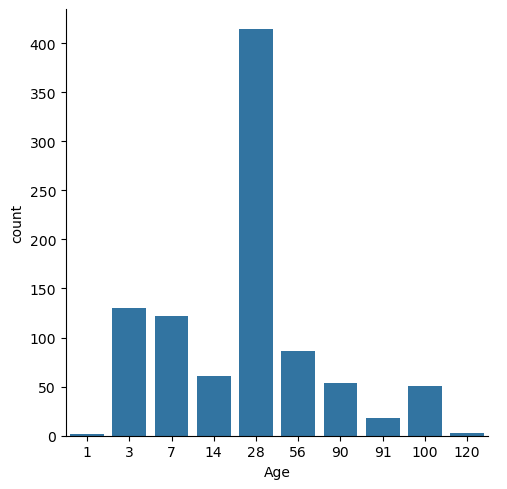

In [14]:
sns.catplot(data=df,x='Age',kind='count')

<Axes: ylabel='Frequency'>

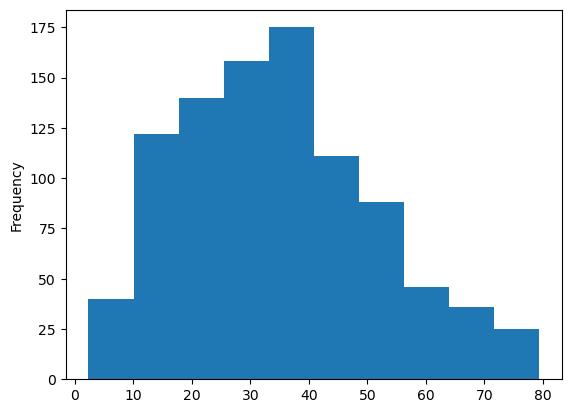

In [15]:
df['Concrete compressive strength'].plot(kind='hist')

<Axes: xlabel='Concrete compressive strength', ylabel='Density'>

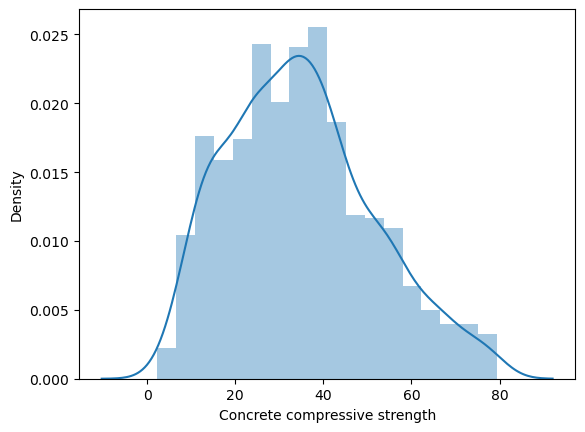

In [16]:
sns.distplot(df['Concrete compressive strength'])

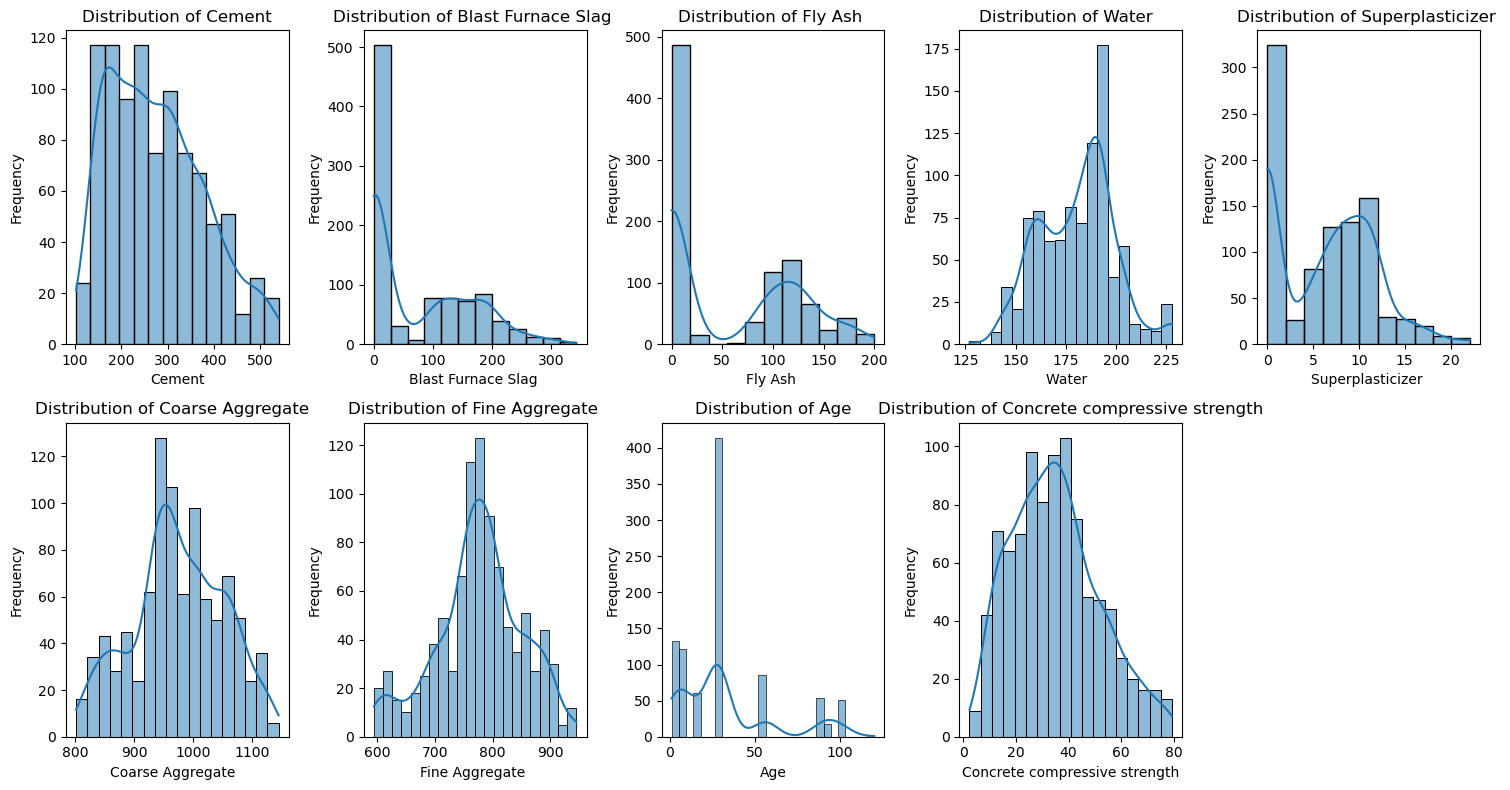

In [17]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
n_cols = 5
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Calculate number of rows needed

# Plot the distribution of each numerical column
plt.figure(figsize=(15, n_rows * 4))  # Adjusted figure size

for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [18]:
## Dividing the data independent and dependent variable
x=df.drop('Concrete compressive strength',axis=1) #independenet variables
y=df['Concrete compressive strength'] # dep var

In [19]:
##train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [20]:
x.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
5,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90
7,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28
8,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28
9,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28


In [21]:
y.head()

1    61.89
5    47.03
7    36.45
8    45.85
9    39.29
Name: Concrete compressive strength, dtype: float64

# Linear regression

In [23]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
from sklearn.metrics import r2_score
y_pred_test=lr.predict(x_test)
y_pred_train=lr.predict(x_train)
r2_score(y_train,y_pred_train)

0.7684265114824034

In [25]:
r2_score(y_test,y_pred_test)

0.7721586106071443

# Bagging 

In [27]:
from sklearn.ensemble import BaggingRegressor
br = BaggingRegressor(n_estimators=50, random_state=42)

In [28]:
# Train the model
br.fit(x_train, y_train)

BaggingRegressor(n_estimators=50, random_state=42)

In [29]:
from sklearn.metrics import r2_score
y_pred_test=br.predict(x_test)
y_pred_train=br.predict(x_train)
r2_score(y_train,y_pred_train)

0.9831732205195828

In [30]:
r2_score(y_test,y_pred_test)

0.9188859400175342

# Adaboost

In [32]:
from sklearn.ensemble import AdaBoostRegressor
ab = AdaBoostRegressor(n_estimators=50, random_state=42)

In [33]:
# Train the model
ab.fit(x_train, y_train)

AdaBoostRegressor(random_state=42)

In [34]:
from sklearn.metrics import r2_score
y_pred_test=ab.predict(x_test)
y_pred_train=ab.predict(x_train)
r2_score(y_train,y_pred_train)

0.8261110794570162

In [35]:
r2_score(y_test,y_pred_test)

0.8241106151984693

# Gradient boosting


In [37]:
from sklearn.ensemble import GradientBoostingRegressor

In [38]:
# Create and train the Gradient Boosting Regressor model
gb = GradientBoostingRegressor()
gb.fit(x_train, y_train)

GradientBoostingRegressor()

In [39]:
from sklearn.metrics import r2_score
y_pred_test=gb.predict(x_test)
y_pred_train=gb.predict(x_train)
r2_score(y_train,y_pred_train)

0.9490662712631888

In [40]:
r2_score(y_test,y_pred_test)

0.9140849350983759

# XGBoost

In [42]:
from xgboost import XGBRegressor
xb = XGBRegressor()

In [43]:
xb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
from sklearn.metrics import r2_score
y_pred_test=xb.predict(x_test)
y_pred_train=xb.predict(x_train)
r2_score(y_train,y_pred_train)

0.9949496703665089

In [45]:
r2_score(y_test,y_pred_test)

0.94302332355738

# K-nearest Neighbor (KNN)

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)  
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [48]:
from sklearn.metrics import r2_score
y_pred_test=knn.predict(x_test)
y_pred_train=knn.predict(x_train)
r2_score(y_train,y_pred_train)

0.8032103186649854

In [49]:
r2_score(y_test,y_pred_test)

0.6892268247059823

# Random forest

In [51]:
## Random forest
from sklearn.ensemble import RandomForestRegressor
Rforest=RandomForestRegressor()
Rforest.fit(x_train,y_train)

RandomForestRegressor()

In [52]:
from sklearn.metrics import r2_score
y_pred_test=Rforest.predict(x_test)
y_pred_train=Rforest.predict(x_train)
r2_score(y_train,y_pred_train)

0.983743286668191

In [53]:
r2_score(y_test,y_pred_test)

0.9205397167332211

In [79]:
data = {
    'Algorithm': ['linear Regression', 'Bagging','Adaboost','Gradientboost', 'XGboost', 'knn','Random forest'],
    'Training_accuracy': [76, 98, 82, 94,99,80,98],
    'Testing_accuracy': [77, 91,82,91,94,68,92]
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
display(df)

,Algorithm,Training_accuracy,Testing_accuracy
0,linear Regression,76,77
1,Bagging,98,91
2,Adaboost,82,82
3,Gradientboost,94,91
4,XGboost,99,94
5,knn,80,68
6,Random forest,98,92


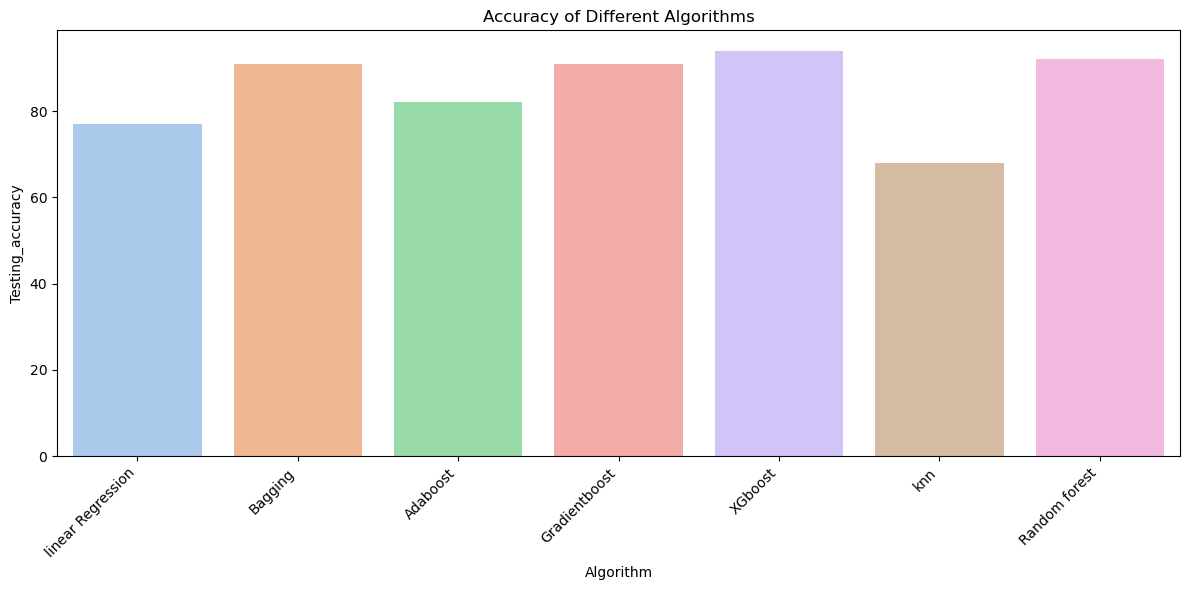

In [83]:
# Plot the bar graph
plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Testing_accuracy', data=df, palette='pastel')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Algorithm')
plt.ylabel('Testing_accuracy')
plt.title('Accuracy of Different Algorithms')
plt.tight_layout()

# Show the plot
plt.show()

# Hyper parameter tuning

In [57]:
import xgboost as xgb
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

In [59]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}


In [63]:
# Initialize GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator=xg_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')


In [67]:
# Fit GridSearchCV
grid_search.fit(x_train, y_train)
r2 = r2_score(y_test, y_pred_test)


In [69]:
# Print the best parameters and the corresponding score
print("Best parameters found: ", grid_search.best_params_)
print("Best MSE: ", -grid_search.best_score_)
print(f"R-squared: {r2}")


Best parameters found:  {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Best MSE:  18.628676578101466
R-squared: 0.9205397167332211


# Prediction on unseen data

In [ ]:
new_data=np.array([300,100,0,30,2,9,6,30]).reshape(1,-1)
new_data

In [ ]:
best_model.predict(new_data)